# Assignment 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Function for logistic regression
def model(df,rate,theta,no_of_iter):
    for j in range(no_of_iter):
        for i in df.index:
            tmp=np.dot(theta,df.iloc[i])
            tmp=(-1)*tmp
            tmp=1/(1+np.exp(tmp))
            theta=np.add(list((rate)*(y[i]-tmp)*(df.iloc[i])),theta)
    return theta

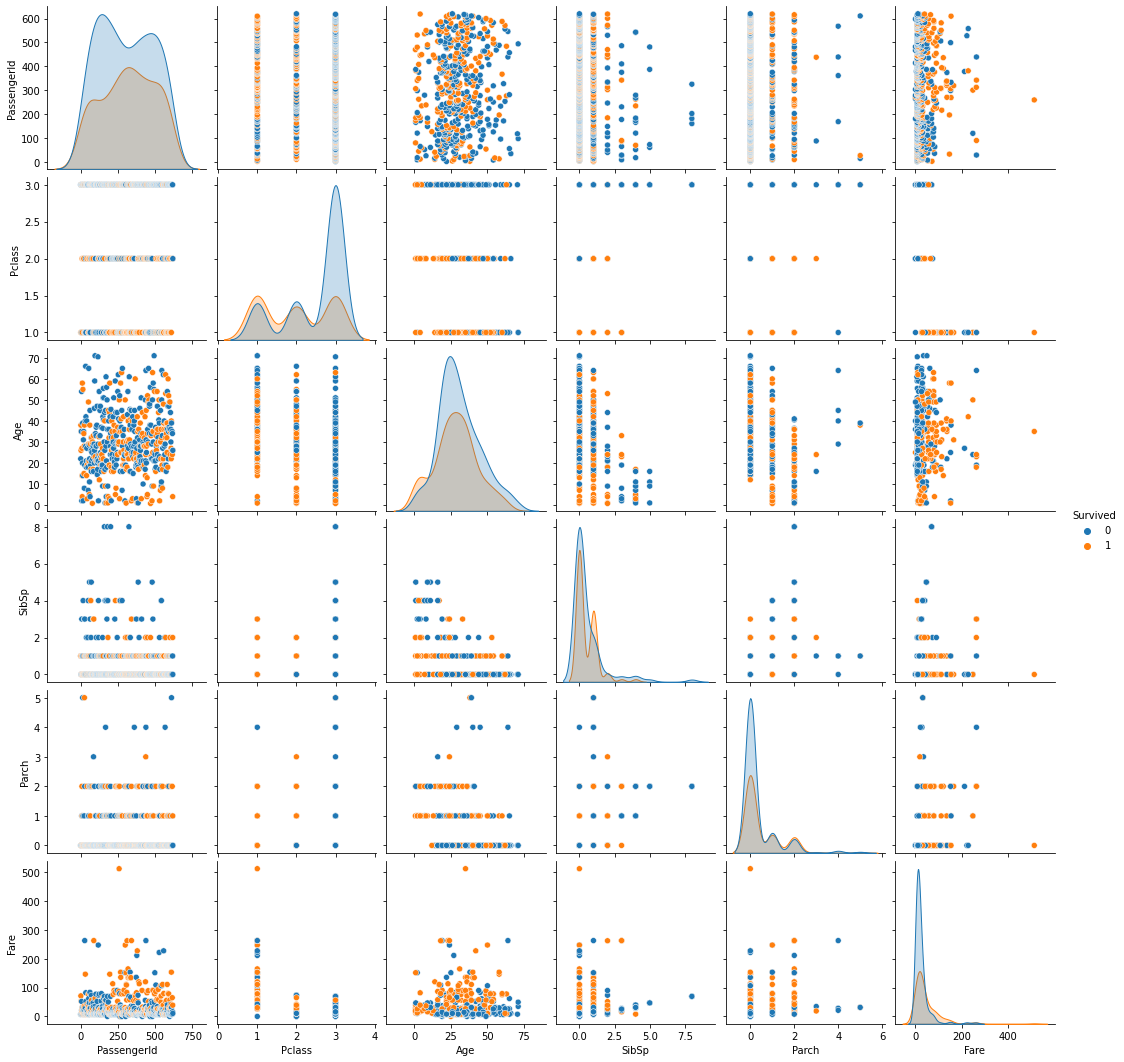

In [3]:
df_train=pd.read_csv("../data/train.csv")
sns.pairplot(df_train,hue="Survived")   # Data visualization

In [4]:
# Data pipeline for training data
df_train=df_train.replace(to_replace="male",value=1)
df_train=df_train.replace(to_replace="female",value=0)
# These are the outliers there fare is very low but most of them are still saved thus they reduce the performance
df_train=df_train[df_train["Fare"]!=0]
df_train=df_train.fillna(df_train.median(skipna=True))
# Age doesn't seem logically right to be 0
df_train[df_train["Age"]<1]=1
df_train=df_train.reset_index()
y=df_train["Survived"]
df_train=df_train.drop(["PassengerId","Survived","index"],axis=1)
df_train["intercept"]=np.ones(df_train.shape[0])

In [5]:
theta=pd.Series([1,1,1,1,1,1,1])
rate=0.001
theta=model(df_train,rate,theta,100)
theta

0   -0.138776
1   -2.883529
2   -0.055543
3   -0.475022
4    0.104542
5    0.043916
6    1.634627
dtype: float64

In [6]:
# Data pipeline for test data
df_test=pd.read_csv("../data/test.csv")
df_test=df_test.replace(to_replace="male",value=1)
df_test=df_test.replace(to_replace="female",value=0)
df_test=df_test.fillna(df_test.median(skipna=True))
df_test=df_test.reset_index()
yTrue=df_test["Survived"]
df_test=df_test.drop(["PassengerId","index","Survived"],axis=1)
df_test["intercept"]=np.ones(df_test.shape[0])


In [7]:
def stats(df,yTrue,theta):
    loss=0
    yPred=np.array([])
    for i in df.index:
        tmp=np.dot(theta,df.iloc[i])
        tmp=(-1)*tmp
        tmp=1/(1+np.exp(tmp))
        yPred=np.append(yPred,tmp)
    for i in range(len(yPred)):
        loss=loss-yTrue.iloc[i]*(np.log(yPred[i]))-(1-yTrue.iloc[i])*(np.log(1-yPred[i]))

    yPred[yPred<0.5]= 0  
    yPred[yPred>=0.5]=1

    fn=0
    tp=0
    fp=0
    tn=0
    for i in range(len(yPred)):
        if yPred[i]==0 and yTrue[i]==1:
            fn +=1
        elif yPred[i]==1 and yTrue[i]==1:
            tp +=1
        elif yPred[i]==1 and yTrue[i]==0:
            fp +=1
        else:
            tn +=1

    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    accuracy=(tp+tn)/(len(yPred))
    f1_score=2/(1/precision+1/recall)

    return accuracy,loss,f1_score

In [8]:
accuracy,loss,f1_score=stats(df_train,y,theta)
print("Stats for training data")
print("Accuracy= ",accuracy)
print("Loss= ",loss)
print("F1 score= ",f1_score,"\n")
accuracy,loss,f1_score=stats(df_test,yTrue,theta)
print("Stats for testing data")
print("Accuracy= ",accuracy)
print("Loss= ",loss)
print("F1 score= ",f1_score)

Stats for training data
Accuracy=  0.7643207855973814
Loss=  366.7493417333233
F1 score=  0.6771300448430493 

Stats for testing data
Accuracy=  0.7896678966789668
Loss=  126.38063333764273
F1 score=  0.6705202312138728
